# Network Intrusion Detection

In [56]:
# Import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import sys  # Import sys for maxsize

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)  # Use sys.maxsize instead of np.nan
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


## LOAD DATA

In [57]:
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")
train.head(-1)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.00,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,0,tcp,http,S1,339,14600,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,33,0.5,0.03,0.0,0.0,1.00,0.00,0.06,173,255,1.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,normal
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.00,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.00,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly


In [58]:
print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

In [59]:
print(test.head(4))

print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))
# test.head(-1)

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp   private  REJ          0          0     0   
1         0           tcp   private  REJ          0          0     0   
2         2           tcp  ftp_data   SF      12983          0     0   
3         0          icmp     eco_i   SF         20          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

## EXPLORATORY ANALYSIS

In [62]:
# Descriptive statistics
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# The num_outbound_cmds field counts how many commands the client sends to the server.
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

num_outbound_cmds
0    25192
Name: count, dtype: int64
num_outbound_cmds
0    22544
Name: count, dtype: int64


In [64]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
#train.drop(['num_outbound_cmds'], axis=1, inplace=True)
#test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [65]:
# Attack Class Distribution
train['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

## SCALING NUMERICAL ATTRIBUTES

In [66]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, LabelEncoder

# # **Initialize StandardScaler**
# scaler = StandardScaler()

# # **Extract numerical attributes**
# num_cols = train.select_dtypes(include=['float64', 'int64']).columns

# # **Apply StandardScaler Correctly**
# sc_train = scaler.fit_transform(train[num_cols])  # Fit on train
# sc_test = scaler.transform(test[num_cols])  # Transform on test

# # **Convert scaled data back to DataFrame**
# sc_traindf = pd.DataFrame(sc_train, columns=num_cols)
# sc_testdf = pd.DataFrame(sc_test, columns=num_cols)

## SCALING NUMERICAL AND ENCODING CATEGORICAL ATTRIBUTES

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder



# **Initialize StandardScaler**
scaler = StandardScaler()

# **Extract numerical attributes**
num_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# **Apply StandardScaler Correctly**
sc_train = scaler.fit_transform(train[num_cols])  # Fit on train
sc_test = scaler.transform(test[num_cols])  # Transform on test

# **Convert scaled data back to DataFrame with same column names**
sc_traindf = pd.DataFrame(sc_train, columns=num_cols, index=train.index)
sc_testdf = pd.DataFrame(sc_test, columns=num_cols, index=test.index)

# **Initialize LabelEncoder Dictionary**
encoder_dict = {}  # Store encoders for each categorical column

# **Extract categorical attributes**
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
if 'class' in cat_cols:
    cat_cols.remove('class')  # Remove target variable if it exists

# **Encode categorical attributes (train)**
train_encoded = pd.DataFrame(index=train.index)
test_encoded = pd.DataFrame(index=test.index)

for col in cat_cols:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train[col])  # Fit on train, transform train
    encoder_dict[col] = le  # Store encoder for test

    # **Transform test data using the same encoding**
    test_encoded[col] = test[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# **Combine numerical & categorical features**
train_x = pd.concat([sc_traindf, train_encoded], axis=1)
test_x = pd.concat([sc_testdf, test_encoded], axis=1)

# **Separate target column (only for train data)**
train_y = train["class"]  # Target variable

# **Check final shape**
print("Train Shape:", train_x.shape)
print("Test Shape:", test_x.shape)


Train Shape: (25192, 41)
Test Shape: (22544, 41)


In [68]:
#train_x
train_y

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object

In [12]:
# train_x = pd.concat([sc_traindf,enctrain],axis=1)
# train_y = train['class']
# train_x.shape

In [24]:
# test_df = pd.concat([sc_testdf,testcat],axis=1)
# test_df.shape

## FEATURE SELECTION

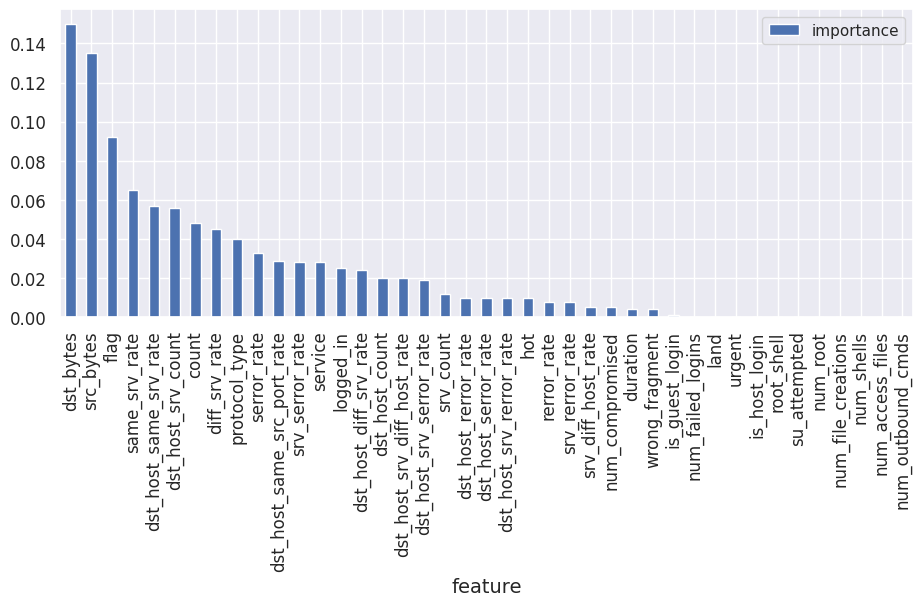

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [70]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'hot',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'protocol_type',
 'service',
 'flag']

## DATASET PARTITION

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x[selected_features],train_y,train_size=0.70, random_state=2)

## FITTING MODELS

In [72]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest, RandomForestClassifier
import numpy as np

# Train Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies (-1 = anomaly, 1 = normal)
iso_predictions = iso_forest.predict(X_test)

# Convert anomalies into a binary class label (1 = normal, 0 = anomaly)
iso_labels = np.where(iso_predictions == 1, 1, 0)

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train)

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0, max_iter=1000)
LGR_Classifier.fit(X_train, Y_train)

# Train Bernoulli Naive Bayes Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

# Train Random Forest Classifier
RFC_Classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
RFC_Classifier.fit(X_train, Y_train)

# Predict using Isolation Forest
iso_forest_predictions = iso_forest.predict(X_test)

# Make predictions using other classifiers
knn_predictions = KNN_Classifier.predict(X_test)
lgr_predictions = LGR_Classifier.predict(X_test)
bnb_predictions = BNB_Classifier.predict(X_test)
dtc_predictions = DTC_Classifier.predict(X_test)
rfc_predictions = RFC_Classifier.predict(X_test)


### AutoEncoder

In [73]:
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np

input_dim = X_train.shape[1]  # e.g., 15 features
input_layer = Input(shape=(input_dim,))  # ✅ fix here
encoded = Dense(32, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 72.9472 - val_loss: 69.0105
Epoch 2/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 72.8707 - val_loss: 68.9863
Epoch 3/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 72.7818 - val_loss: 68.9778
Epoch 4/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 72.2929 - val_loss: 68.9743
Epoch 5/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 72.4508 - val_loss: 68.9381
Epoch 6/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 72.0354 - val_loss: 68.9342
Epoch 7/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 72.1982 - val_loss: 68.9330
Epoch 8/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 72.7024 - val_loss: 68.9323
Epoch 9/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.7215 - val_loss: 68.9320
Epoch 10/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.5577 - val_loss: 68.9314
Epoch 11/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.4610 - val_loss: 68.9312
Epoch 12/50
496/496 ━━━━━━━━━━

In [74]:
reconstructed = autoencoder.predict(X_test)

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step


In [75]:
import numpy as np
reconstruction_error = np.mean(np.square(X_test - reconstructed), axis=1)

In [76]:
threshold = np.mean(reconstruction_error)+ 3 * np.std(reconstruction_error)

In [77]:
anomalies = reconstruction_error > threshold

In [78]:
print(f"Detected {np.sum(anomalies)} anomalies out of { len(X_test)} samples.")

Detected 52 anomalies out of 7558 samples.


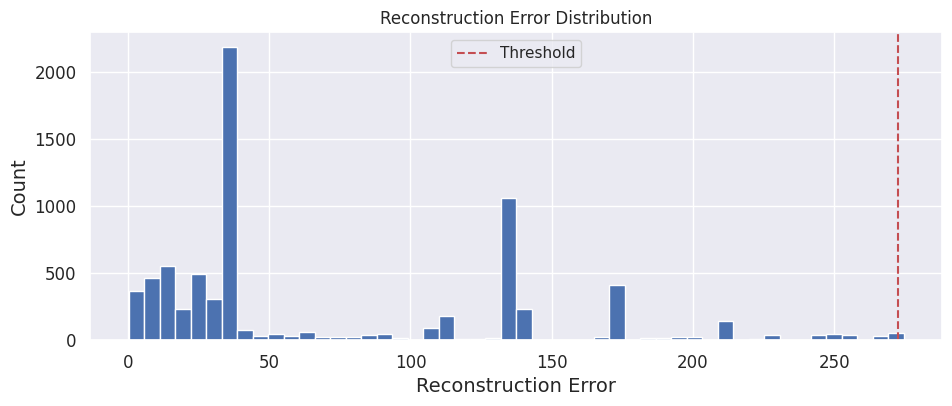

In [79]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_error, bins=50)
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Count')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()


## EVALUATE MODELS

In [80]:
from sklearn import metrics
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define classifiers
BNB_Classifier = BernoulliNB()
DTC_Classifier = DecisionTreeClassifier()
KNN_Classifier = KNeighborsClassifier()
LGR_Classifier = LogisticRegression(max_iter=1000)
RFC_Classifier = RandomForestClassifier()

# Append classifiers to a list
models = [
    ('Naive Bayes Classifier', BNB_Classifier),
    ('Decision Tree Classifier', DTC_Classifier),
    ('KNeighbors Classifier', KNN_Classifier),
    ('Logistic Regression', LGR_Classifier),
    ('RandomForestClassifier', RFC_Classifier)
]

# Split dataset (Using your split method)
# X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, train_size=0.70, random_state=2)

# Train and evaluate supervised models
for name, model in models:
    model.fit(X_train, Y_train)  # Fit the model

    # Perform cross-validation
    scores = cross_val_score(model, X_train, Y_train, cv=10)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    conf_matrix = metrics.confusion_matrix(Y_test, y_pred)
    classification = metrics.classification_report(Y_test, y_pred)

    print(f"\n============================== {name} Model Evaluation ==============================")
    print(f"Cross Validation Mean Score: {scores.mean():.4f}")
    print(f"Model Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{classification}")

# ============================================
# Isolation Forest - Unsupervised Model
# ============================================

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies (-1 = anomaly, 1 = normal)
iso_predictions = iso_forest.predict(X_test)

# Convert Isolation Forest output to match Y_test labels
iso_labels = np.where(iso_predictions == -1, 0, 1)  # 0 = anomaly, 1 = normal

# Ensure Y_test is numeric (if it's categorical)
if isinstance(Y_test.iloc[0], str):  # Check if labels are strings
    Y_test = Y_test.map({"anomaly": 0, "normal": 1})

# Evaluate Isolation Forest Model
accuracy = metrics.accuracy_score(Y_test, iso_labels)
conf_matrix = metrics.confusion_matrix(Y_test, iso_labels)
classification_report = metrics.classification_report(Y_test, iso_labels)

print("\n============================== Isolation Forest Model Evaluation ==============================")
print("\nUsing Isolation Forest for anomaly detection:")
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_report}")



============================== Naive Bayes Classifier Model Evaluation ==============================
Cross Validation Mean Score: 0.8774
Model Accuracy: 0.8751
Confusion Matrix:
[[3009  489]
 [ 455 3605]]
Classification Report:
              precision    recall  f1-score   support

     anomaly       0.87      0.86      0.86      3498
      normal       0.88      0.89      0.88      4060

    accuracy                           0.88      7558
   macro avg       0.87      0.87      0.87      7558
weighted avg       0.88      0.88      0.88      7558


============================== Decision Tree Classifier Model Evaluation ==============================
Cross Validation Mean Score: 0.9954
Model Accuracy: 0.9946
Confusion Matrix:
[[3482   16]
 [  25 4035]]
Classification Report:
              precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      3498
      normal       1.00      0.99      0.99      4060

    accuracy                           0.99    

## VALIDATING MODELS

In [38]:
#  Step 1: Predict with Supervised Models
# Load new test data
# Ensure X_test is preprocessed the same way as X_train
y_test_pred = {}

for name, model in models:
    y_test_pred[name] = model.predict(X_test)

    print(f"\n==================== Predictions using {name} ====================")
    print(y_test_pred[name][:10])  # Show first 10 predictions



==================== Predictions using Naive Bayes Classifier ====================
['anomaly' 'anomaly' 'normal' 'anomaly' 'normal' 'anomaly' 'normal'
 'anomaly' 'normal' 'normal']

==================== Predictions using Decision Tree Classifier ====================
['anomaly' 'anomaly' 'anomaly' 'anomaly' 'normal' 'anomaly' 'normal'
 'anomaly' 'normal' 'normal']

==================== Predictions using KNeighbors Classifier ====================
['anomaly' 'anomaly' 'anomaly' 'anomaly' 'normal' 'anomaly' 'normal'
 'anomaly' 'normal' 'normal']

==================== Predictions using Logistic Regression ====================
['anomaly' 'normal' 'anomaly' 'anomaly' 'normal' 'anomaly' 'normal'
 'anomaly' 'normal' 'normal']

==================== Predictions using RandomForestClassifier ====================
['anomaly' 'anomaly' 'anomaly' 'anomaly' 'normal' 'anomaly' 'normal'
 'anomaly' 'normal' 'normal']


In [39]:
# Step 2: Predict Anomalies with Isolation Forest
# ------------------------------------------------

# Predict anomalies (-1 = anomaly, 1 = normal)
iso_test_predictions = iso_forest.predict(X_test)

# Convert predictions to human-readable labels
iso_test_labels = np.where(iso_test_predictions == -1, "anomaly", "normal")

# Display first 10 predictions
print("\n==================== Predictions using Isolation Forest ====================")
print(f"First 10 Predictions: {iso_test_labels[:10]}")



==================== Predictions using Isolation Forest ====================
First 10 Predictions: ['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal']


In [40]:
# Ensure all model predictions are converted to numeric (if categorical)
for name, model in models:
    if isinstance(y_test_pred[name][0], str):  # Check if labels are strings
        y_test_pred[name] = np.where(y_test_pred[name] == "anomaly", 0, 1)

    acc = metrics.accuracy_score(Y_test, y_test_pred[name])
    print(f"{name} Accuracy on Test Data: {acc:.4f}")

# Ensure Isolation Forest predictions match Y_test format
if isinstance(iso_test_labels[0], str):  # Check if labels are strings
    iso_test_labels = np.where(iso_test_labels == "anomaly", 0, 1)

iso_acc = metrics.accuracy_score(Y_test, iso_test_labels)
print(f"\nIsolation Forest Accuracy on Test Data: {iso_acc:.4f}")


Naive Bayes Classifier Accuracy on Test Data: 0.8754
Decision Tree Classifier Accuracy on Test Data: 0.9936
KNeighbors Classifier Accuracy on Test Data: 0.9873
Logistic Regression Accuracy on Test Data: 0.9419
RandomForestClassifier Accuracy on Test Data: 0.9962

Isolation Forest Accuracy on Test Data: 0.5586


## Code for Saving Models

In [81]:
import pandas as pd
import joblib  # For saving models

# ========================== Save Predictions ==========================

# Create a DataFrame for test predictions
predictions_df = pd.DataFrame({
    'Actual': Y_test,              # Actual labels
    'Predicted': iso_test_labels   # Predicted labels (anomaly/normal)
})

# Save predictions to CSV
predictions_df.to_csv("isolation_forest_predictions.csv", index=False)
print("Predictions saved as 'isolation_forest_predictions.csv'")

# ========================== Save Models ==========================

# Save Supervised Models
for name, model in models:
    model_filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, model_filename)
    print(f"{name} model saved as '{model_filename}'")

# Save Isolation Forest Model
joblib.dump(iso_forest, "isolation_forest_model.pkl")
print("Isolation Forest model saved as 'isolation_forest_model.pkl'")



Predictions saved as 'isolation_forest_predictions.csv'
Naive Bayes Classifier model saved as 'naive_bayes_classifier_model.pkl'
Decision Tree Classifier model saved as 'decision_tree_classifier_model.pkl'
KNeighbors Classifier model saved as 'kneighbors_classifier_model.pkl'
Logistic Regression model saved as 'logistic_regression_model.pkl'
RandomForestClassifier model saved as 'randomforestclassifier_model.pkl'
Isolation Forest model saved as 'isolation_forest_model.pkl'


In [82]:
# Convert numerical predictions back to string labels for debugging
for name, model in models:
    y_test_pred_str = np.where(y_test_pred[name] == 0, "anomaly", "normal")  # Convert 0 → "anomaly", 1 → "normal"
    
    print(f"\n===== {name} Raw Predictions =====")
    print(y_test_pred_str[:20])  # Print first 20 predictions for debugging



===== Naive Bayes Classifier Raw Predictions =====
['anomaly' 'anomaly' 'normal' 'anomaly' 'normal' 'anomaly' 'normal'
 'anomaly' 'normal' 'normal' 'normal' 'normal' 'anomaly' 'anomaly'
 'anomaly' 'anomaly' 'anomaly' 'normal' 'normal' 'normal']

===== Decision Tree Classifier Raw Predictions =====
['anomaly' 'anomaly' 'anomaly' 'anomaly' 'normal' 'anomaly' 'normal'
 'anomaly' 'normal' 'normal' 'normal' 'normal' 'normal' 'anomaly'
 'anomaly' 'anomaly' 'anomaly' 'normal' 'normal' 'normal']

===== KNeighbors Classifier Raw Predictions =====
['anomaly' 'anomaly' 'anomaly' 'anomaly' 'normal' 'anomaly' 'normal'
 'anomaly' 'normal' 'normal' 'normal' 'normal' 'normal' 'anomaly'
 'anomaly' 'anomaly' 'anomaly' 'normal' 'normal' 'normal']

===== Logistic Regression Raw Predictions =====
['anomaly' 'normal' 'anomaly' 'anomaly' 'normal' 'anomaly' 'normal'
 'anomaly' 'normal' 'normal' 'normal' 'normal' 'normal' 'anomaly'
 'anomaly' 'anomaly' 'anomaly' 'normal' 'normal' 'normal']

===== RandomForest

## Code for Saving Predictions

In [83]:
print("Available keys in y_test_pred:", y_test_pred.keys())


Available keys in y_test_pred: dict_keys(['Naive Bayes Classifier', 'Decision Tree Classifier', 'KNeighbors Classifier', 'Logistic Regression', 'RandomForestClassifier'])


In [84]:
import pandas as pd
import numpy as np

# Define a mapping function
def convert_to_label(value):
    return "normal" if value == 0 else "anomaly"

# Convert NumPy arrays using vectorization
predictions_df = pd.DataFrame({
    'Actual': np.vectorize(convert_to_label)(Y_test),
    'Naive Bayes Classifier': np.vectorize(convert_to_label)(y_test_pred['Naive Bayes Classifier']),
    'Decision Tree Classifier': np.vectorize(convert_to_label)(y_test_pred['Decision Tree Classifier']),
    'KNeighbors Classifier': np.vectorize(convert_to_label)(y_test_pred['KNeighbors Classifier']),
    'Logistic Regression': np.vectorize(convert_to_label)(y_test_pred['Logistic Regression']),
    'Isolation Forest': np.vectorize(convert_to_label)(iso_test_labels)  # Assuming iso_test_labels is an array
})

# Save to CSV file
csv_filename = "model_predictions.csv"
predictions_df.to_csv(csv_filename, index=False)

print(f"Predictions saved to {csv_filename}")


Predictions saved to model_predictions.csv


In [85]:
test_x=test_x[selected_features]
test_x.to_csv("test_df.csv", index=False)
print("test_df.csv saved successfully!!!")

test_df.csv saved successfully!!!


In [86]:
# PREDICTING FOR TEST DATA using KNN, Naive Bayes, Logistic Regression, Decision Tree
test_df=test_x[selected_features]
pred_knn = KNN_Classifier.predict(test_df)
pred_NB = BNB_Classifier.predict(test_df)
pred_log = LGR_Classifier.predict(test_df)
pred_dt = DTC_Classifier.predict(test_df)

In [87]:
predictions_df = pd.DataFrame({
    "ID": test_df.index,  # Assuming the test file has an index
    "KNN_Prediction": pred_knn,
    "NaiveBayes_Prediction": pred_NB,
    "LogisticRegression_Prediction": pred_log,
    "DecisionTree_Prediction": pred_dt
})

predictions_df.to_csv("new_test_predictions.csv", index=False)
print("\n Predictions saved to 'new_test_predictions.csv'")



 Predictions saved to 'new_test_predictions.csv'


## Predictions on unseen data

In [88]:
import pandas as pd
import joblib

def predict_decision_tree(model, test_df, selected_features):
    """
    Predicts labels using a trained Decision Tree model.

    Parameters:
    - model: Trained Decision Tree Classifier (loaded from .pkl file).
    - test_df: Pandas DataFrame containing test data.
    - selected_features: List of selected feature names.

    Returns:
    - predictions: Predicted labels for test data.
    """
    # Ensure test_df contains only selected features
    missing_cols = set(selected_features) - set(test_df.columns)
    if missing_cols:
        print(f"Warning: Missing columns in test data: {missing_cols}")
        for col in missing_cols:
            test_df[col] = 0.0  # Fill missing columns with 0.0 (or use mean if required)

    # Remove extra columns not in selected_features
    extra_cols = set(test_df.columns) - set(selected_features)
    if extra_cols:
        print(f"Warning: Extra columns in test data being dropped: {extra_cols}")
        test_df.drop(columns=extra_cols, inplace=True)

    # Ensure correct column order
    test_df_selected = test_df[selected_features].astype(float)

    # Make predictions
    predictions = model.predict(test_df_selected)

    return predictions

# **Load the trained Decision Tree model**
model_path = "decision_tree_classifier_model.pkl"  # Update with correct path
try:
    DTC_Classifier = joblib.load(model_path)
except FileNotFoundError:
    print(f"Error: Model file '{model_path}' not found. Please check the path.")
    exit()

# **Load test data**
test_data_path = "test_df.csv"  # Update with your test data path
try:
    test_data = pd.read_csv(test_data_path)
except FileNotFoundError:
    print(f"Error: Test data file '{test_data_path}' not found. Please check the path.")
    exit()

# **Get the feature names used during training**
expected_features = DTC_Classifier.feature_names_in_

# **Fix missing columns by adding them with default values**
missing_cols = set(expected_features) - set(test_data.columns)
if missing_cols:
    print(f"Warning: Missing columns in test data: {missing_cols}")
    for col in missing_cols:
        test_data[col] = 0.0  # Fill missing columns with 0.0

# **Remove extra columns that were not in training**
extra_cols = set(test_data.columns) - set(expected_features)
if extra_cols:
    print(f"Warning: Extra columns in test data being dropped: {extra_cols}")
    test_data.drop(columns=extra_cols, inplace=True)

# **Ensure correct feature order**
test_data = test_data[list(expected_features)]

# **Convert necessary columns to numeric**
test_data = test_data.astype(float)

# **Make predictions**
predictions = predict_decision_tree(DTC_Classifier, test_data, expected_features)

# **Convert predictions to DataFrame**
predictions_df = pd.DataFrame({"Predictions": predictions})

# **Save predictions to CSV**
predictions_csv_path = "predictions.csv"
predictions_df.to_csv(predictions_csv_path, index=False)

print(f"Predictions completed successfully! Saved to '{predictions_csv_path}'.")


Predictions completed successfully! Saved to 'predictions.csv'.


In [89]:
print("Features used during training:", DTC_Classifier.feature_names_in_)


Features used during training: ['src_bytes' 'dst_bytes' 'hot' 'logged_in' 'count' 'srv_count'
 'same_srv_rate' 'diff_srv_rate' 'dst_host_srv_count'
 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'protocol_type' 'service' 'flag']


###  This graph will show which features have the most influence in classifying Normal vs. Anomaly.

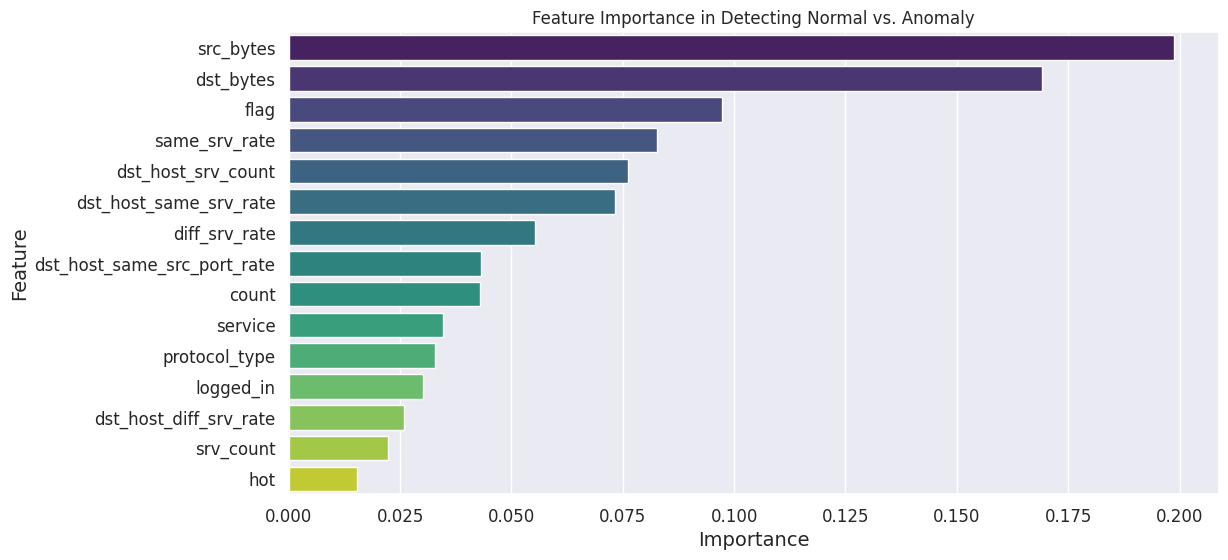

In [90]:
## import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importance
importances = rfe.estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title("Feature Importance in Detecting Normal vs. Anomaly")
plt.show()


### Distribution plots

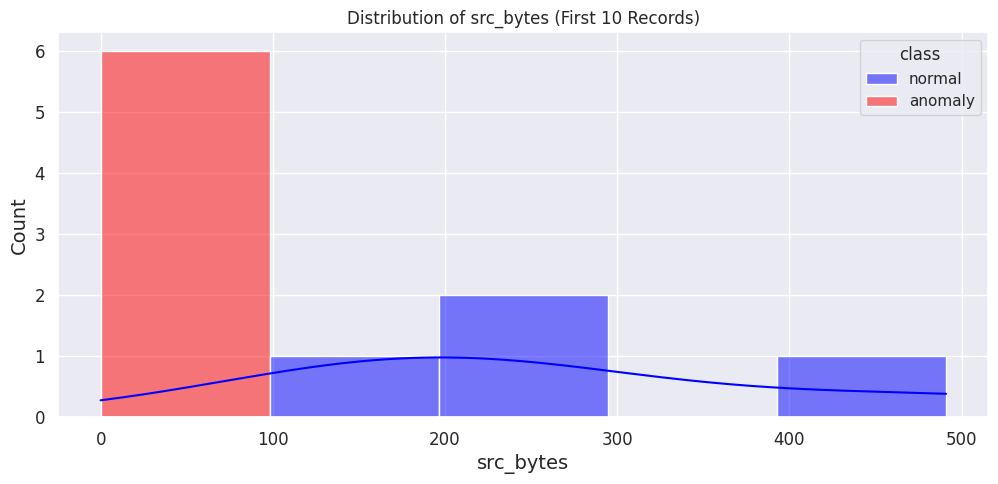

In [91]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train = pd.read_csv("Train_data.csv")

# Define the selected features you want to analyze
selected_features = [
    'src_bytes', 'dst_bytes', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'protocol_type', 
    'service', 'flag'
]

# Extract the selected features from the dataframe
subset_data = train[selected_features]

# Extract the target 'class' column (your target column)
subset_labels = train['class']  # Replace with the actual name if it's different

# Select the first 10 records
subset_data = subset_data.head(10)
subset_labels = subset_labels.head(10)

# Add labels to subset_data for hue in plotting
subset_data['class'] = subset_labels.values

# Define color mapping for classes
palette = {"normal": "blue", "anomaly": "red"}

# Plot histogram for the 'src_bytes' feature (you can change to any other feature as needed)
plt.figure(figsize=(12, 5))
sns.histplot(data=subset_data, x="src_bytes", hue="class", kde=True, palette=palette)
plt.title("Distribution of src_bytes (First 10 Records)")
plt.show()


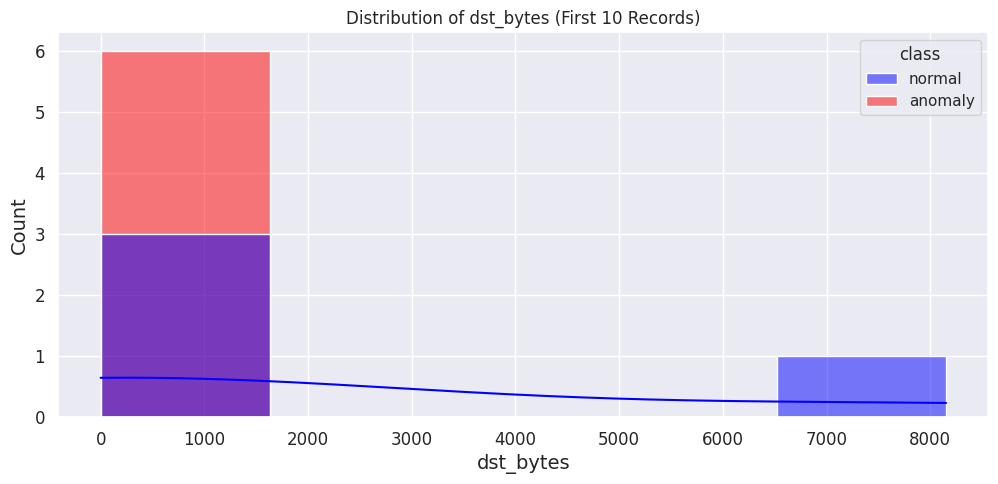

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train = pd.read_csv("Train_data.csv")

# Define the selected features you want to analyze
selected_features = [
    'src_bytes', 'dst_bytes', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'protocol_type', 
    'service', 'flag'
]

# Extract the selected features from the dataframe
subset_data = train[selected_features]

# Extract the target 'class' column (your target column)
subset_labels = train['class']  # Replace with the actual name if it's different

# Select the first 10 records
subset_data = subset_data.head(10)
subset_labels = subset_labels.head(10)

# Add labels to subset_data for hue in plotting
subset_data['class'] = subset_labels.values

# Define color mapping for classes
palette = {"normal": "blue", "anomaly": "red"}

# Plot histogram for the 'dst_bytes' feature (you can change to any other feature as needed)
plt.figure(figsize=(12, 5))
sns.histplot(data=subset_data, x="dst_bytes", hue="class", kde=True, palette=palette)
plt.title("Distribution of dst_bytes (First 10 Records)")
plt.show()


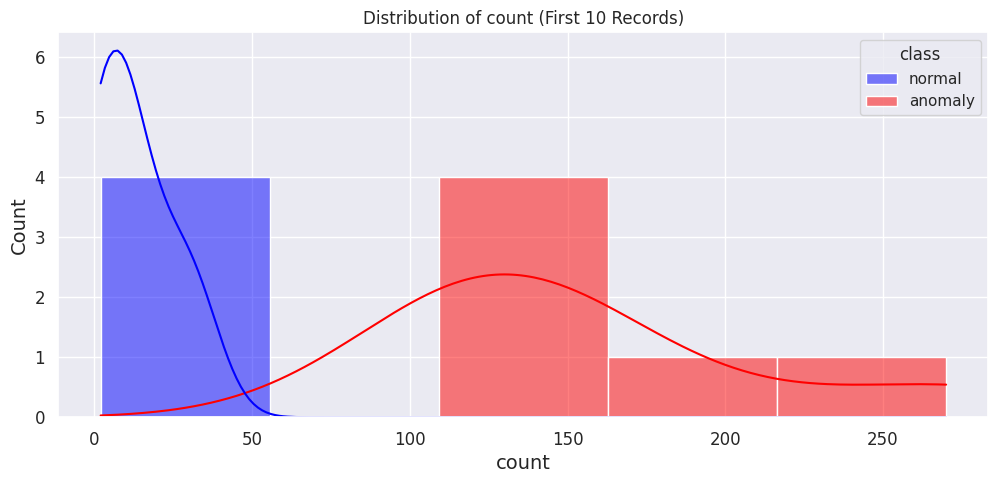

In [52]:
# Plot histogram for the 'count' feature
plt.figure(figsize=(12, 5))
sns.histplot(data=subset_data, x="count", hue="class", kde=True, palette=palette)
plt.title("Distribution of count (First 10 Records)")
plt.show()


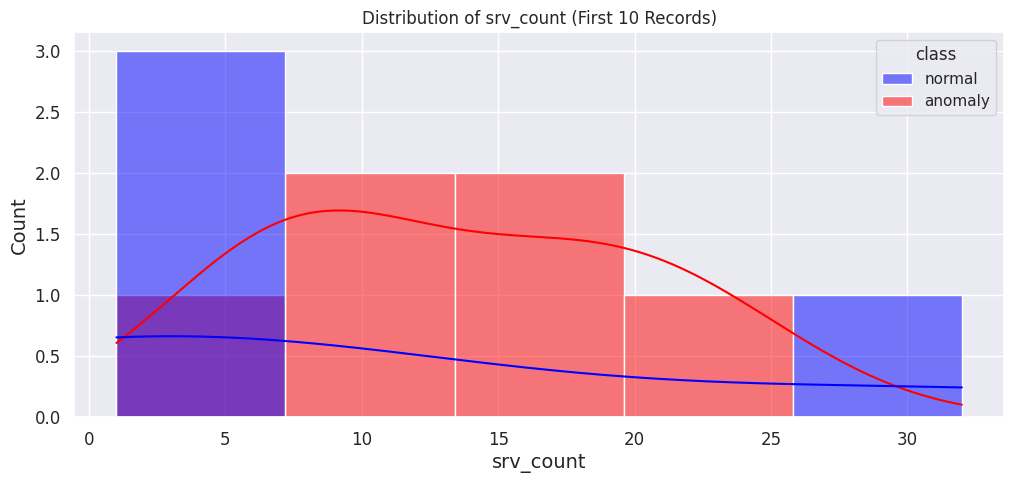

In [93]:
# Plot histogram for the 'srv_count' feature
plt.figure(figsize=(12, 5))
sns.histplot(data=subset_data, x="srv_count", hue="class", kde=True, palette=palette)
plt.title("Distribution of srv_count (First 10 Records)")
plt.show()


In [94]:
train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


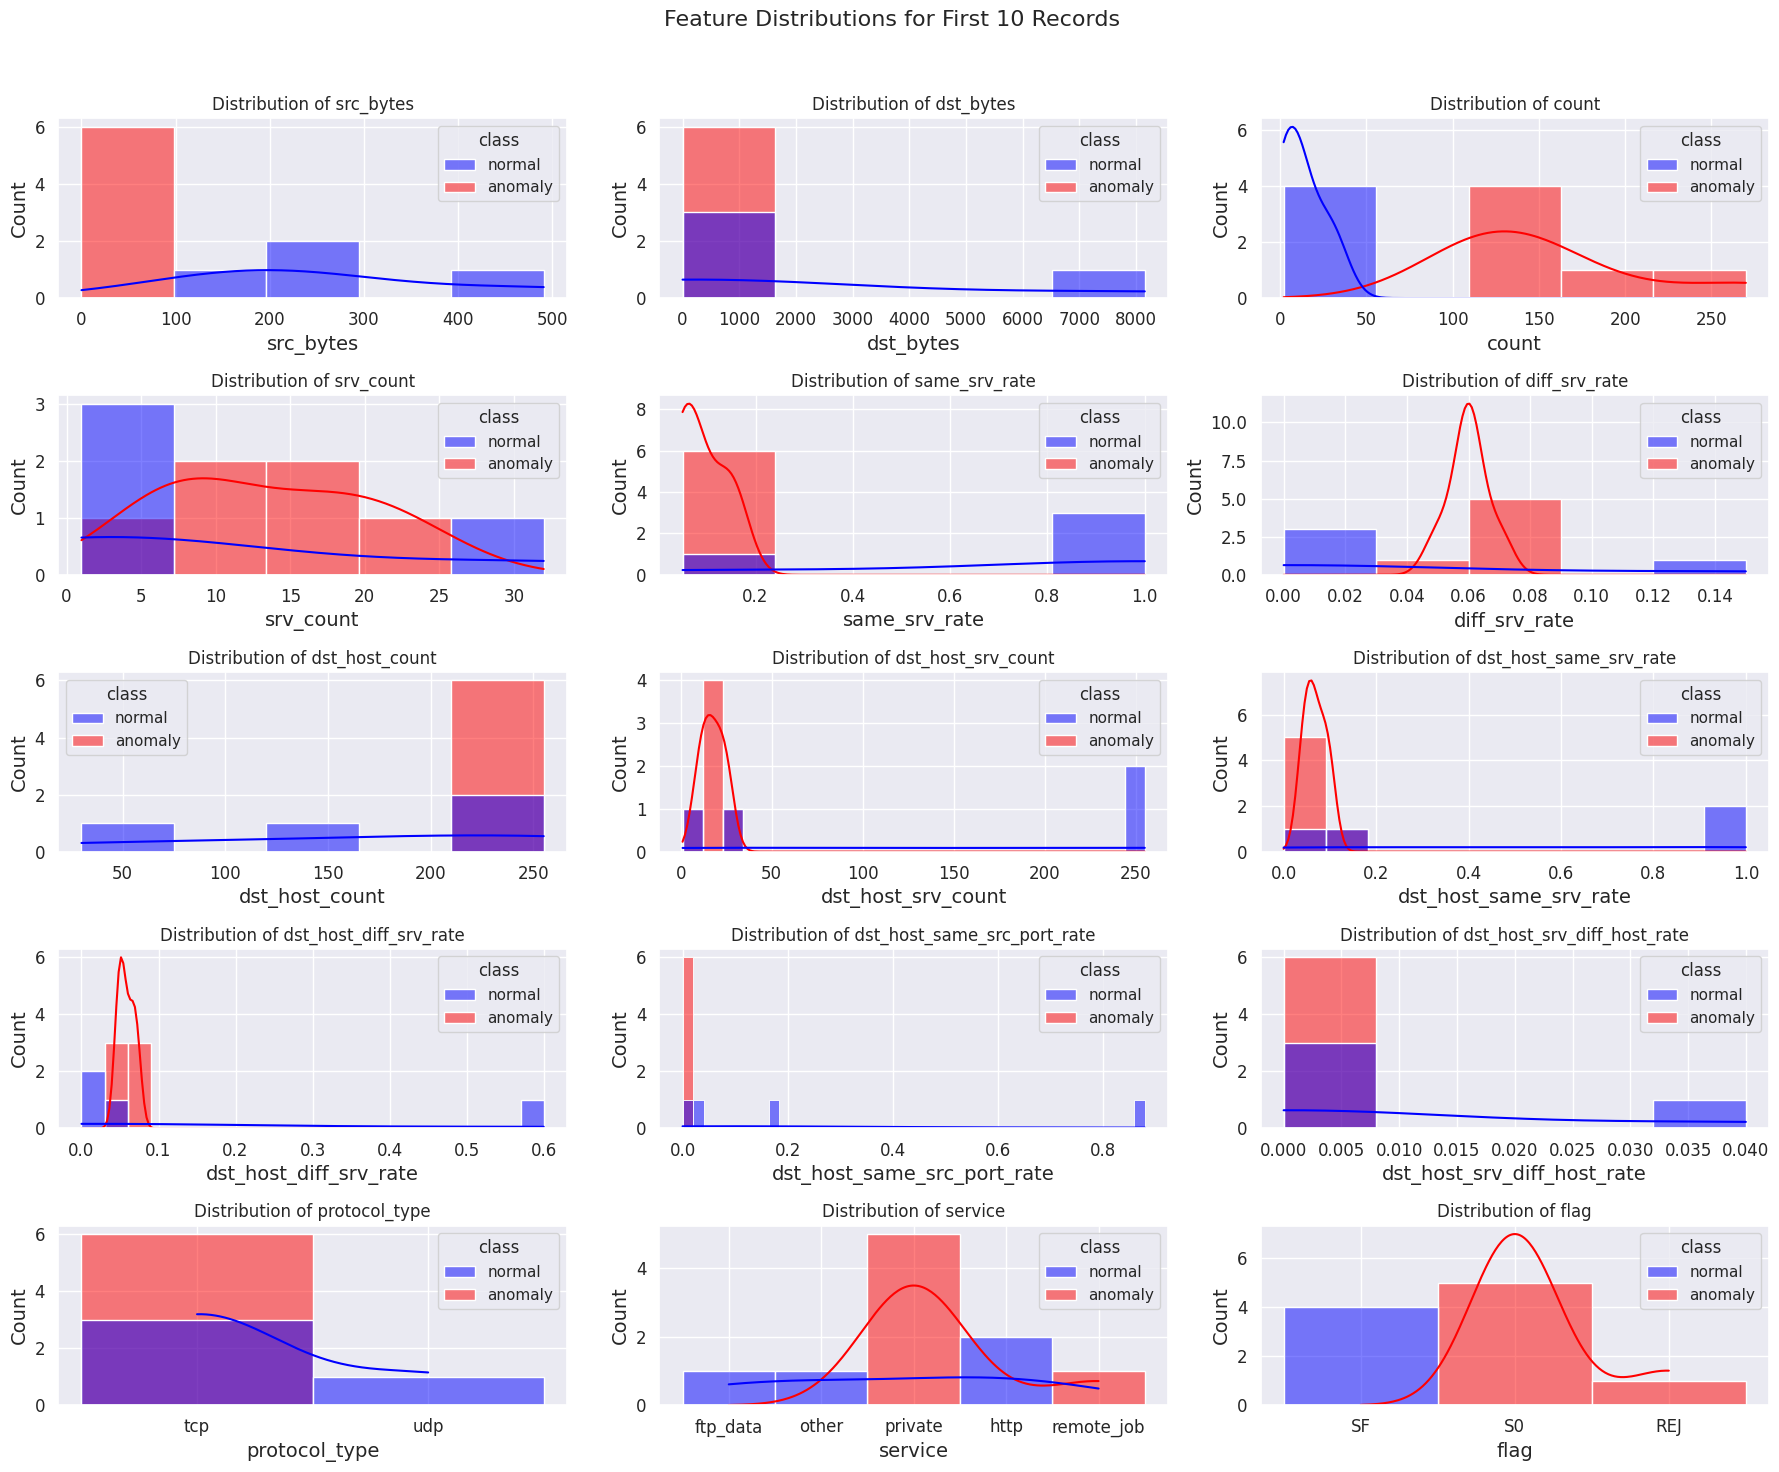

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train = pd.read_csv("Train_data.csv")

# Define the selected features
selected_features = [
    'src_bytes', 'dst_bytes', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'protocol_type', 
    'service', 'flag'
]

# Extract the first 10 records
subset_data = train[selected_features].head(10)
subset_data['class'] = train['class'].head(10)  # Add the class column

# Define color mapping for classes
palette = {"normal": "blue", "anomaly": "red"}

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 15))  # 5 rows, 3 columns
fig.suptitle("Feature Distributions for First 10 Records", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for idx, feature in enumerate(selected_features):
    sns.histplot(data=subset_data, x=feature, hue="class", kde=True, palette=palette, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {feature}")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
